# <span style ='color: red'>  Author: Nikolin Prenga </span>

# <span style ='color: darkblue'>  Date Created: May 12, 2024 </span>

# <span style ='color: green'>Description: Implementation and Comparison of LeNet-5 and AlexNet Models in Python Using MRI Images: Demonstrating the Superiority of Deep Convolutional Neural Networks Over Shallow Models </span>

# Importing the necessary libraries

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from Image_Data_Preprocessing import Image_Processing as Process_Images
import time
warnings.filterwarnings("ignore")
import keras_tuner as kt

In [ ]:
home_dir_train ='MRI_Training/'
home_dir_test ='MRI_Testing/'
#######################################################################################################################
# Given the directory of the dataset for training and testing, extract images, resize them, and process
# the images to have 3 channels for the AlexNet model using the 'Image_Processing' module developed by Nikolin Prenga.

training_data_alexnet, training_labels_alexnet, training_text_alex = Process_Images(home_dir_train).load_data_and_crop()
X_test_alexnet, y_test_alexnet, y_text_alexnet = Process_Images(home_dir_test).load_data_and_crop()

#######################################################################################################################
# For the LeNet-5 model, we aim to use images in grayscale; therefore, extract images, resize them, and process
# them to have 1 channel using the 'Image_Processing' module developed by Nikolin Prenga.

training_data_lenet, training_labels_lenet , training_text_lenet = Process_Images(home_dir_train).load_data_and_crop_Optionally()
X_test_lenet, y_test_lenet, y_text_lenet = Process_Images(home_dir_test).load_data_and_crop_Optionally()

In [ ]:
#############################################################################################################
# Split the training dataset into training and validation sets for the AlexNet model.
#############################################################################################################



X_train_alexnet, X_val_alexnet, y_train_alexnet, y_val_alexnet = train_test_split(training_data_alexnet, training_labels_alexnet,
                                                              test_size=0.1289, random_state=42)
#############################################################################################################
# Split the training dataset into training and validation sets for the LeNet-5 model.
#############################################################################################################

X_train_lenet, X_val_lenet, y_train_lenet, y_val_lenet = train_test_split(training_data_lenet, training_labels_lenet,
                                                             test_size=0.1289, random_state=42 )



In [ ]:
#############################################################################################################
# Display the shapes of datasets for the AlexNet model, which uses 3 channels (RGB).
#############################################################################################################



print(f'Training dataset shape for MRI images (AlexNet Model): {X_train_alexnet.shape}')
print(f'Validation dataset shape for MRI images (AlexNet Model): {X_val_alexnet.shape}')
print(f'Testing dataset shape for MRI images (AlexNet Model): {X_test_alexnet.shape}\n')

print(f'Training labels shape for MRI images (AlexNet Model): {y_train_alexnet.shape}')
print(f'Validation labels shape for MRI images (AlexNet Model): {y_val_alexnet.shape}')
print(f'Testing labels shape for MRI images (AlexNet Model): {y_test_alexnet.shape} \n')

#############################################################################################################
# Dataset shapes for the LeNet-5 model (Note: We use grayscale images for this model).
#############################################################################################################

print('#####################################################################################')

print(f'\nTraining dataset shape for MRI images (LeNet-5 Model): {X_train_lenet.shape}')
print(f'Validation dataset shape for MRI images (LeNet-5 Model): {X_val_lenet.shape}')
print(f'Testing dataset shape for MRI images (LeNet-5 Model): {X_test_lenet.shape}\n')

print(f'Training labels shape for MRI images (LeNet-5 Model): {y_train_lenet.shape}')
print(f'Validation labels shape for MRI images (LeNet-5 Model): {y_val_lenet.shape}')
print(f'Testing labels shape for MRI images (LeNet-5 Model): {y_test_lenet.shape}')




Training dataset shape for MRI images (AlexNet Model): (4975, 240, 240, 3)
Validation dataset shape for MRI images (AlexNet Model): (737, 240, 240, 3)
Testing dataset shape for MRI images (AlexNet Model): (1311, 240, 240, 3)

Training labels shape for MRI images (AlexNet Model): (4975,)
Validation labels shape for MRI images (AlexNet Model): (737,)
Testing labels shape for MRI images (AlexNet Model): (1311,) 

#####################################################################################

Training dataset shape for MRI images (LeNet-5 Model): (4975, 250, 250)
Validation dataset shape for MRI images (LeNet-5 Model): (737, 250, 250)
Testing dataset shape for MRI images (LeNet-5 Model): (1311, 250, 250)

Training labels shape for MRI images (LeNet-5 Model): (4975,)
Validation labels shape for MRI images (LeNet-5 Model): (737,)
Testing labels shape for MRI images (LeNet-5 Model): (1311,)


In [ ]:
#######################################################################################################################
## Normalizing Data and Converting to Float32 for AlexNet Model

# Normalize pixel values in the test set
X_test_alexnet = X_test_alexnet.copy() / 255.0
# Convert the data type to 'float32'
X_test_alexnet = X_test_alexnet.astype('float32')

# Normalize pixel values in the training set
X_train_alexnet = X_train_alexnet.copy() / 255.0
# Convert the data type to 'float32'
X_train_alexnet= X_train_alexnet.astype('float32')

# Normalize pixel values in the validation set
X_val_alexnet = X_val_alexnet.copy()/255.0
# Convert the data type to 'float32'
X_val_alexnet= X_val_alexnet.astype('float32')

#######################################################################################################################
## Normalizing Data and Converting to Float32 for LeNet-5 Model, thus adding an extra dimension for the model to handle it in '3D'

X_train_lenet = X_train_lenet/255.0
X_train_lenet = X_train_lenet.astype('float32')
X_train_lenet =np.expand_dims(X_train_lenet, -1)

X_val_lenet = X_val_lenet/255.0
X_val_lenet = X_val_lenet.astype('float32')
X_val_lenet =np.expand_dims(X_val_lenet, -1)

X_test_lenet = X_test_lenet/255.0
X_test_lenet = X_test_lenet.astype('float32')
X_test_lenet = np.expand_dims(X_test_lenet, -1)




In [ ]:
print('Normalized pixel values in training dataset for AlexNet: min={}, max={}'.format(X_train_alexnet.min(), X_train_alexnet.max()))
print('Normalized pixel values in testing dataset for AlexNet: min={}, max={}'.format(X_val_alexnet.min(), X_val_alexnet.max()))
print('Normalized pixel values in validation dataset for AlexNet: min={}, max={}'.format(X_test_alexnet.min(), X_test_alexnet.max()))
print('')
print('Normalized pixel values in training dataset for LenNet: min={}, max={}'.format(X_train_lenet.min(), X_train_alexnet.max()))
print('Normalized pixel values in testing dataset for LenNet: min={}, max={}'.format(X_val_lenet.min(), X_val_alexnet.max()))
print('Normalized pixel values in validation dataset for LenNet: min={}, max={}'.format(X_test_lenet.min(), X_test_alexnet.max()))

Normalized pixel values in training dataset for AlexNet: min=0.0, max=1.0
Normalized pixel values in testing dataset for AlexNet: min=0.0, max=1.0
Normalized pixel values in validation dataset for AlexNet: min=0.0, max=1.0

Normalized pixel values in training dataset for LenNet: min=0.0, max=1.0
Normalized pixel values in testing dataset for LenNet: min=0.0, max=1.0
Normalized pixel values in validation dataset for LenNet: min=0.0, max=1.0


In [ ]:

# Class names
class_names = {
    0: "No Tumor",
    1: "Glioma Tumor",
    2: "Meningioma Tumor",
    3: "Pituitary Tumor"
}

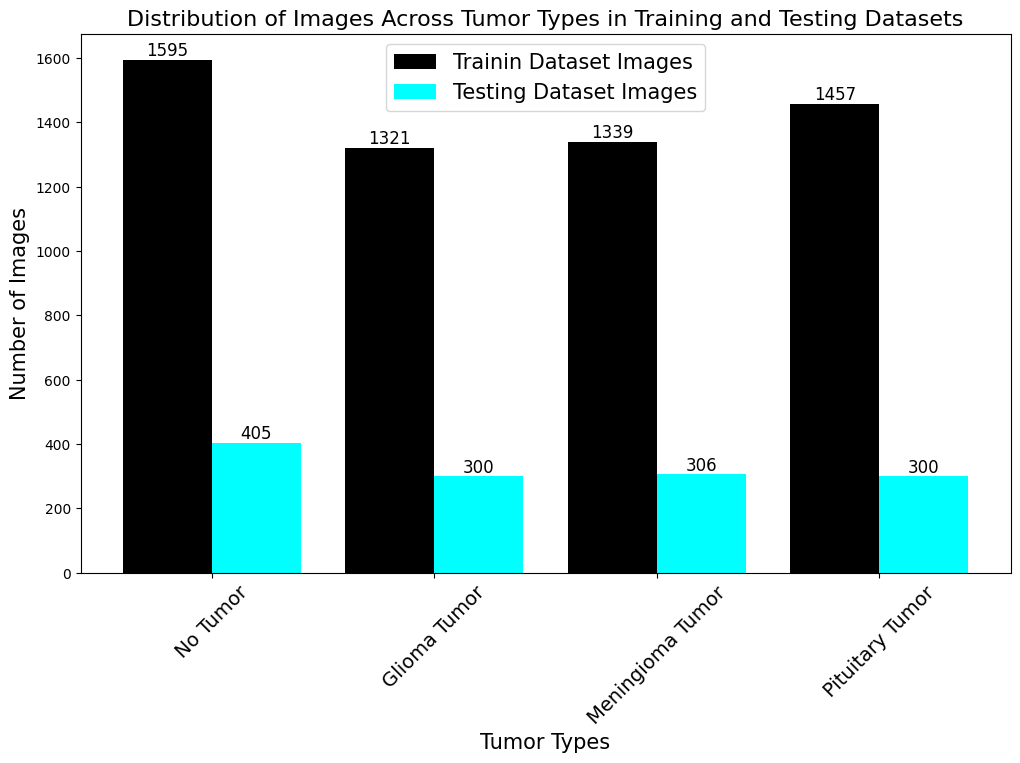

In [ ]:
unique_train, counts_train_labels = np.unique(training_labels_lenet, return_counts=True)
unique_test, counts_test_labels = np.unique(y_test_lenet, return_counts=True)
labels = [class_names[label] for label in unique_train]
X_ax = np.arange(len(labels))

plt.figure(figsize=(12,7))
train_bars = plt.bar(X_ax - 0.2, counts_train_labels, 0.4, color='black', label='Trainin Dataset Images')
test_bars = plt.bar(X_ax + 0.2, counts_test_labels, 0.4, color='cyan', label='Testing Dataset Images')

plt.xticks(X_ax, labels, rotation=45, fontsize=14)
plt.legend(fontsize=15)

plt.ylabel("Number of Images", fontsize=15)
plt.title("Distribution of Images Across Tumor Types in Training and Testing Datasets", fontsize=16)

# For the x-axis label
plt.xlabel("Tumor Types", fontsize=15)


# Adding counts on top of each bar
for bar, count in zip(train_bars, counts_train_labels):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
             ha='center', va='bottom', fontsize=12, color='black')

for bar, count in zip(test_bars, counts_test_labels):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count,
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()


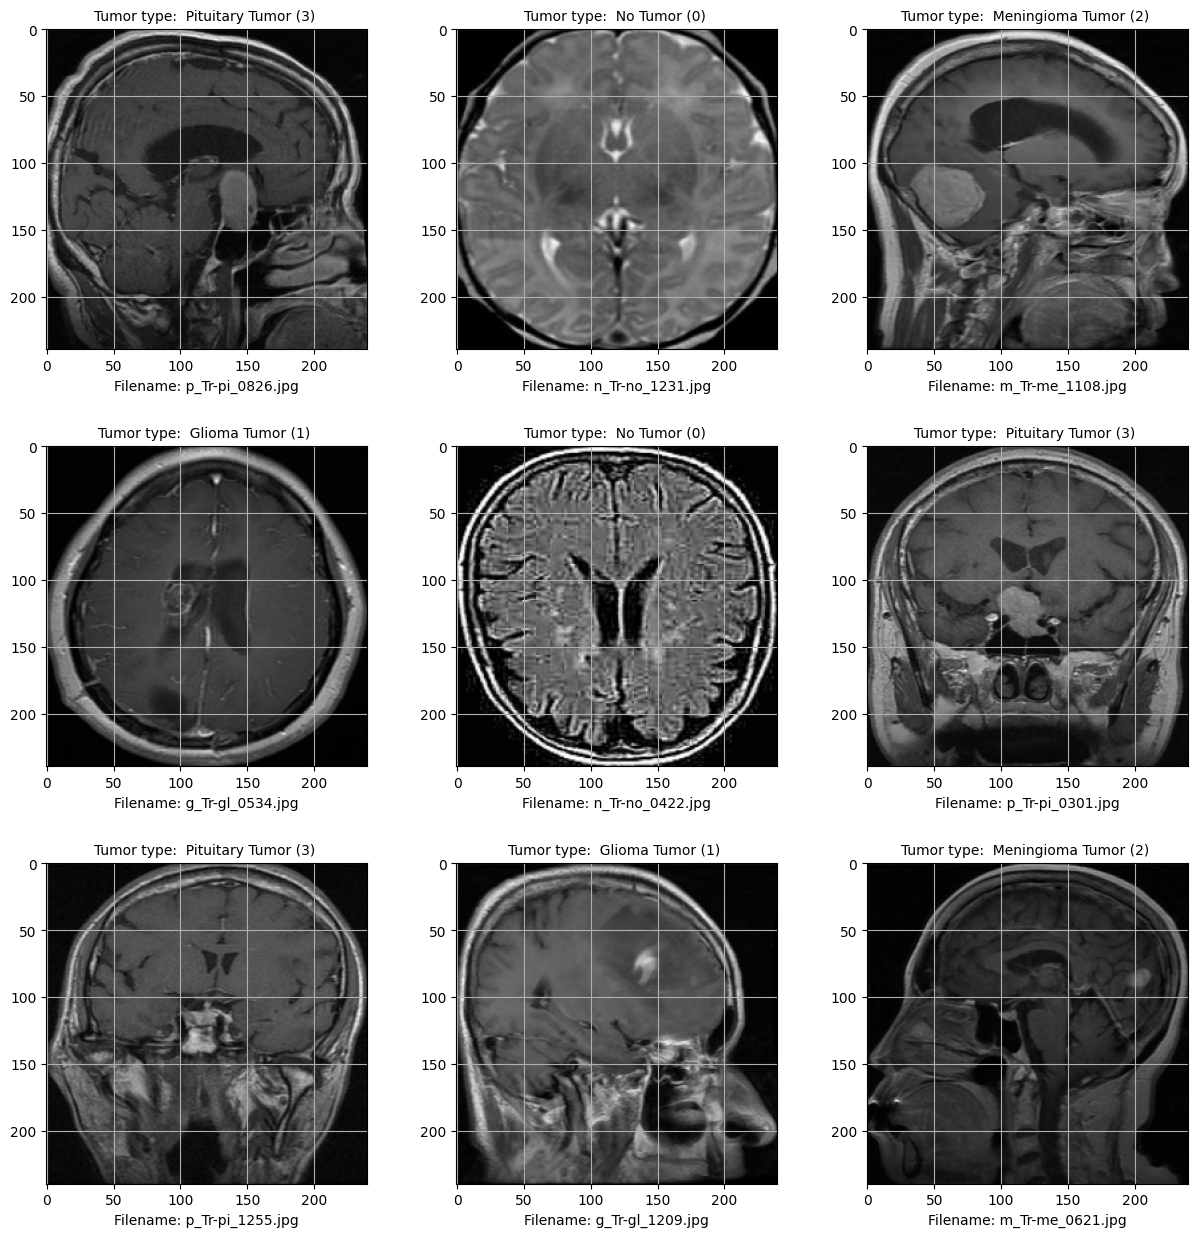

In [ ]:
iter=0
plt.figure(figsize = (15,15))
for i in range(3):
    for k in range(3):
        iter= iter + 1

        plt.subplot(3, 3, iter)
        plt.imshow(training_data_alexnet[iter], cmap='gray')
        plt.title(f'Tumor type:  {class_names[training_labels_alexnet[iter]]} ({training_labels_alexnet[iter]}) ',
                  fontsize=10)
        plt.xlabel(f'Filename: {training_text_alex[iter]}', fontsize=10)
        plt.grid()
plt.subplots_adjust(hspace=0.3)

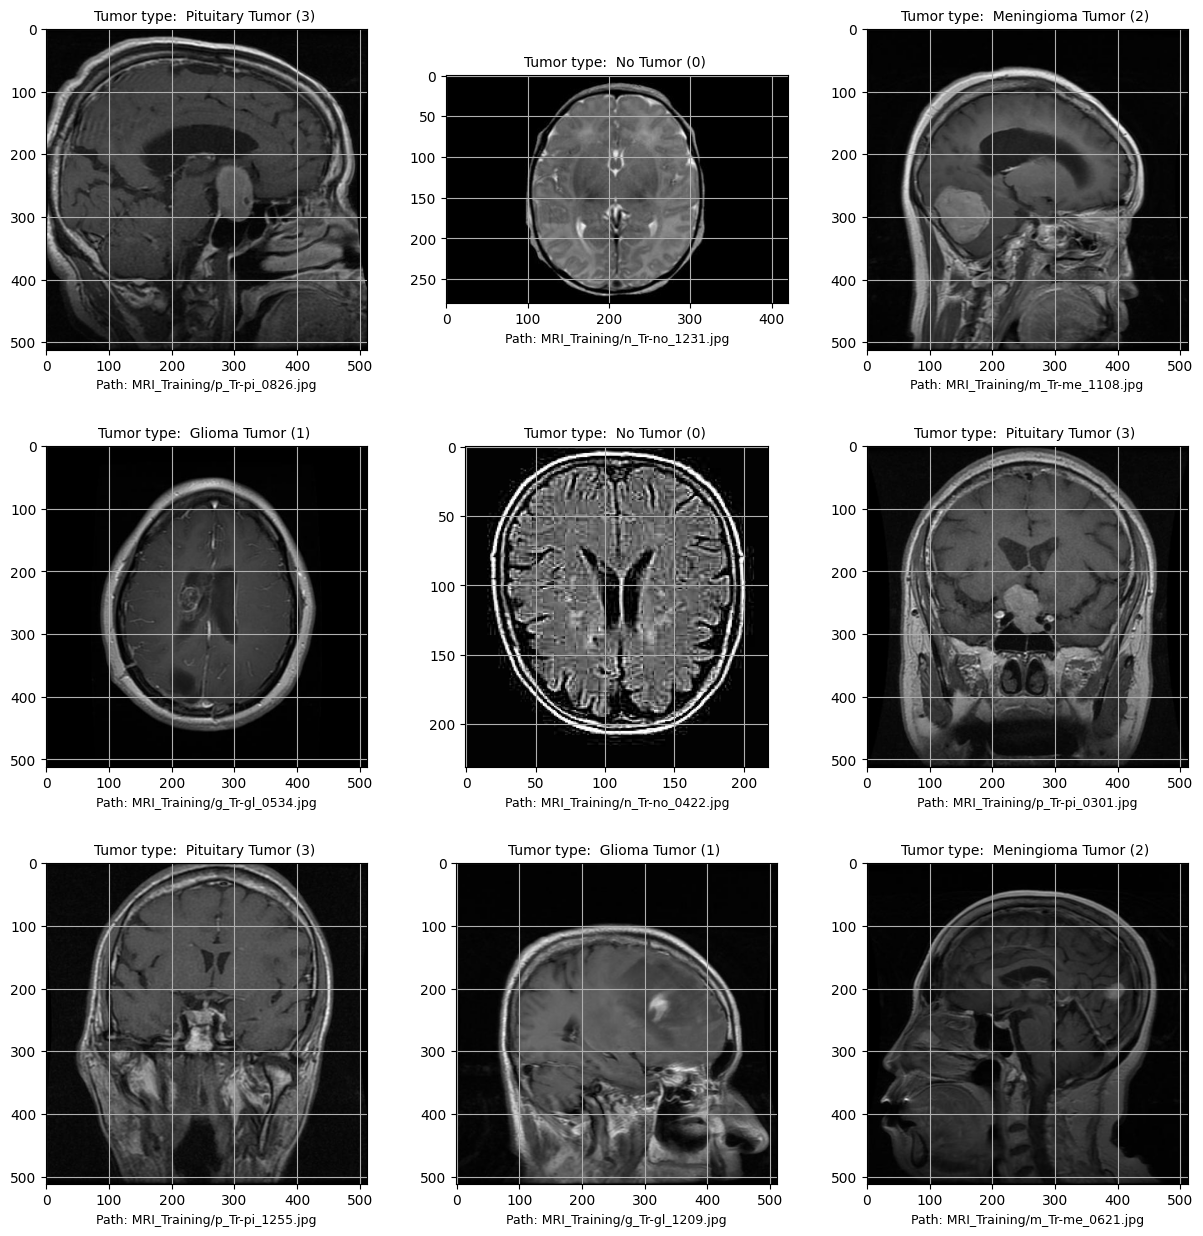

In [ ]:
images =[]
# since above, the iter started at 1
samples_above = training_text_alex[1:10]
plt.figure(figsize = (15,15))
for specific_image in samples_above:
    imag = cv2.imread(home_dir_train+specific_image)
    images.append(imag)

its =0
for k in range(3):
    for u in range(3):
        its = its +1
        plt.subplot(3, 3, its)
        plt.imshow(images[its-1])
        plt.xlabel(f'Path: {home_dir_train+samples_above[its-1]}', fontsize=9)
        plt.title(f'Tumor type:  {class_names[training_labels_alexnet[its]]} ({training_labels_alexnet[its]}) ',
                  fontsize=10)
        plt.grid()

plt.subplots_adjust(hspace=0.3)

In [ ]:
#np.expand_dims(X_test_MRI, axis=3).shape

# Implement the AlexNet model using the Functional API from TensorFlow's Keras library.


In [ ]:
def AlexNet_CNN(Input_shape):
    img_inputs_AlexNet = tf.keras.Input(shape=Input_shape)
    # First Conv Layer
    Conv1_Alex = tf.keras.layers.Conv2D(filters= 96, kernel_size=(11, 11), strides = (4,4), activation ='relu')(img_inputs_AlexNet)
    # First Pooling Layer
    Pool1_Alex = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2))(Conv1_Alex)

     # Second Conv Layer
    Conv2_Alex = tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1, 1),padding="same", activation='relu')(Pool1_Alex)
    # Second Pooling Layer
    Pool2_Alex = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides = (2,2))(Conv2_Alex)
    # Third Conv Layer
    Conv3_Alex = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1, 1),padding="same",  activation='relu')(Pool2_Alex)

    # Forth Conv Layer
    Conv4_Alex = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1, 1),padding="same",  activation='relu')(Conv3_Alex)

    # Fifth and last Conv Layer
    Conv5_Alex = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1),padding="same",  activation='relu')(Conv4_Alex)
    # Third and last Pooling layer
    Pool3_Alex = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding="valid")(Conv5_Alex)
    # Flattening the Layer to 6 x 6 x 256 = 9216 units
    Flatten_Alex = tf.keras.layers.Flatten()(Pool3_Alex)

    Dense1_Alex = tf.keras.layers.Dense(units =4096, activation='relu')(Flatten_Alex)

    Dropout1_Alex = tf.keras.layers.Dropout(0.2)(Dense1_Alex)

    Dense2_Alex = tf.keras.layers.Dense(units =4096, activation='relu')(Dropout1_Alex)

    Dropout2_Alex = tf.keras.layers.Dropout(0.2)(Dense2_Alex)

    output_alex = tf.keras.layers.Dense(units=4, activation='softmax')(Dropout2_Alex)

    #Dropout2_Alex = tf.keras.layers.Dropout(0.2)(Dense2_Alex)
    Model_alex = tf.keras.Model(inputs=img_inputs_AlexNet, outputs=output_alex, name='AlexNet_Model')
    return Model_alex




In [ ]:
# def AlexNet_CNN_BatchNormalization(Input_shape):

#     img_inputs_AlexNet = tf.keras.Input(shape=Input_shape)
#     # First Conv Layer
#     Conv1_Alex = tf.keras.layers.Conv2D(filters= 96, kernel_size=(11, 11), strides = (4,4))(img_inputs_AlexNet)
#     BatchNorm1= BatchNormalization()(Conv1_Alex)
#     Activation_Alex1 =tf.keras.layers.Activation('relu')(BatchNorm1)
#     Pool1_Alex = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2))(Activation_Alex1)

#      # Second Conv Layer
#     Conv2_Alex = tf.keras.layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1, 1),padding="same")(Pool1_Alex)
#     BatchNorm2 = BatchNormalization()(Conv2_Alex)
#     Activation_Alex2 = tf.keras.layers.Activation('relu')(BatchNorm2)
#     Pool2_Alex = tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides = (2,2))(Activation_Alex2)

#     #Third Conv Layer
#     Conv3_Alex = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1, 1),padding="same")(Pool2_Alex)
#     BatchNorm3 = BatchNormalization()(Conv3_Alex)
#     Activation_Alex3 = tf.keras.layers.Activation('relu')(BatchNorm3)

#     # Forth Conv Layer

#     Conv4_Alex = tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1, 1),padding="same")(Activation_Alex3)
#     BatchNorm4 = BatchNormalization()(Conv4_Alex)
#     Activation_Alex4 = tf.keras.layers.Activation('relu')(BatchNorm4)

#     #Fifth Conv Layer
#     Conv5_Alex = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1),padding="same")(Activation_Alex4)
#     BatchNorm5 =BatchNormalization()(Conv5_Alex)
#     Activation_Alex5 = tf.keras.layers.Activation('relu')(BatchNorm5)

#     Pool3_Alex = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding="valid")(Activation_Alex5)

#     # Flattening the Layer to 6 x 6 x 256 = 9216 units
#     Flatten_Alex = tf.keras.layers.Flatten()(Pool3_Alex)

#     # First Dense Layer
#     Dense1_Alex = tf.keras.layers.Dense(units =4096)(Flatten_Alex)
#     BatchNorm_Dense1 = BatchNormalization()(Dense1_Alex)
#     Activation_Dense1 = tf.keras.layers.Activation('relu')(BatchNorm_Dense1)
#     Dropout1_Alex = tf.keras.layers.Dropout(0.20)(Activation_Dense1)

#     # Second and Last Dense Layer
#     Dense2_Alex = tf.keras.layers.Dense(units =4096)(Dropout1_Alex)
#     BatchNorm_Dense2 = BatchNormalization()(Dense2_Alex)
#     Activation_Dense2 = tf.keras.layers.Activation('relu')(BatchNorm_Dense2)
#     Dropout2_Alex = tf.keras.layers.Dropout(0.20)(Activation_Dense2)

#     # The last, the Output layer

#     output_alex = tf.keras.layers.Dense(units=4, activation='softmax')(Dropout2_Alex)

#     Model_alex_BatchNorm = tf.keras.Model(inputs=img_inputs_AlexNet, outputs=output_alex, name='AlexNet_Model_NormBatch')

#     return Model_alex_BatchNorm




#  Implement the LeNet-5 model using the Functional API from TensorFlow's Keras library.


In [ ]:
def LeNet_5_CNN(input_shape):
        img_inputs_letnet = tf.keras.Input(input_shape)

        # First Covolutional Layer
        ConvLayer1 = tf.keras.layers.Conv2D(filters = 26, kernel_size= (3, 3),
                                         strides = (1,1),  activation = 'relu')(img_inputs_letnet)
        # First Poolig Layer MaxPoolin, Average Pooling can be used as well
        Pool_layer1 = tf.keras.layers.MaxPooling2D(pool_size =(3,3),strides=4)(ConvLayer1)
        #Pool_layer1 = tf.keras.layers.AveragePooling2D(pool_size =(2,2),strides=2)(ConvLayer1)

        #Second convolutional layer
        ConvLayer2 = tf.keras.layers.Conv2D(filters =68,kernel_size =(3,3), strides=(1, 1),activation ='relu')(Pool_layer1)

        #Second Pooling layer
        Pool_layer2 = tf.keras.layers.MaxPooling2D(pool_size =(4,4),strides=4)(ConvLayer2)
        #Pool_layer2 = tf.keras.layers.AveragePooling2D(pool_size =(2,2),strides=2)(ConvLayer2)

        # Flattening the image into a vector form
        Flattened = tf.keras.layers.Flatten()(Pool_layer2)

        # First Dense Layer
        first_dense_fully_connected = tf.keras.layers.Dense(units=470,activation='relu')(Flattened)
        Dropout1_lenet = tf.keras.layers.Dropout(0.40)(first_dense_fully_connected)
        # Second Dense Layer

        second_dense_fully_connected = tf.keras.layers.Dense(units=470,activation='relu')(Dropout1_lenet)
        Dropout2_lenet= tf.keras.layers.Dropout(0.20)(second_dense_fully_connected)

        # Output layer with softmax activation function
        output_fully__connected = tf.keras.layers.Dense(units=4,activation='softmax')(Dropout2_lenet)
        #Create a model
        model_letnet5 =  keras.Model(inputs=img_inputs_letnet, outputs=output_fully__connected, name="LeNet5_MRI")

        return model_letnet5




# Configure early stopping to monitor validation loss, stop training if no improvement after 10 epochs, and restore best model weights.


In [ ]:
My_early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.000,
        patience=15,
        verbose=0,
        mode='min',
        baseline=None,
        restore_best_weights=True,
        start_from_epoch=0)

In [ ]:
#####################################################################################################################
# Here, we choose an optimization algorithm and an objective function for the model.
# Depending on the scenario, we might use Adam or Stochastic Gradient Descent.
# The learning rate is a critical hyperparameter that significantly impacts model performance.
######################################################################################################################


chosen_Optimizer_alexnet=  tf.keras.optimizers.legacy.Adam(learning_rate =0.00007)


chosen1_loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

######################################################################################################################
# Define the input shape for the AlexNet model, specifying the dimensions and number of color channels (RGB).
input_alex= (240, 240, 3)
######################################################################################################################
# Compile the model with the specified optimizer, loss function, and metrics to track (accuracy).
Model_AlexNet_NoBatch = AlexNet_CNN(input_alex)
Model_AlexNet_NoBatch.compile(optimizer=chosen_Optimizer_alexnet,
                      loss = chosen1_loss_function,
                      metrics=['accuracy'])
# Print a summary of the model to display its architecture, including layer types, output shapes, and parameter counts.
print(Model_AlexNet_NoBatch.summary())
######################################################################################################################

Model: "AlexNet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 58, 58, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)     

43264

In [ ]:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001, verbose=1)

# Train the AlexNet model without batch normalization on the specified dataset for a number of epochs,
# using early stopping based on validation data performance.

fit_AlexNet_NoBatch = Model_AlexNet_NoBatch.fit(X_train_alexnet, y_train_alexnet, epochs=27,
                               callbacks= [My_early_stopping], validation_data= [X_val_alexnet, y_val_alexnet] )

Epoch 1/27
156/156 [==============================] - 115s 736ms/step - loss: 0.1566 - accuracy: 0.9451 - val_loss: 0.4676 - val_accuracy: 0.8467
Epoch 2/27
156/156 [==============================] - 115s 740ms/step - loss: 0.1035 - accuracy: 0.9614 - val_loss: 0.2197 - val_accuracy: 0.9525
Epoch 3/27
156/156 [==============================] - 112s 720ms/step - loss: 0.0580 - accuracy: 0.9781 - val_loss: 0.2535 - val_accuracy: 0.9308
Epoch 4/27
156/156 [==============================] - 111s 711ms/step - loss: 0.0258 - accuracy: 0.9928 - val_loss: 0.2052 - val_accuracy: 0.9607
Epoch 5/27
156/156 [==============================] - 112s 716ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.2134 - val_accuracy: 0.9620
Epoch 6/27
156/156 [==============================] - 111s 712ms/step - loss: 0.0336 - accuracy: 0.9887 - val_loss: 0.2205 - val_accuracy: 0.9552
Epoch 7/27
156/156 [==============================] - 111s 713ms/step - loss: 0.0085 - accuracy: 0.9968 - val_loss: 0.2834 -

In [ ]:
##########################################################################################################################################
# LeNet-5
###########################################################################################################################################
# Define the input shape for the LeNet-5 model, specifying the dimensions and number of color channels (RGB).
input_lenet= (250, 250, 1)

chosen_Optimizer_lenet=  tf.keras.optimizers.legacy.Adam(learning_rate =0.00007)

# Compile the model with the specified optimizer, loss function, and metrics to track (accuracy).
Model_Lenet = LeNet_5_CNN(input_lenet)
Model_Lenet.compile(optimizer=chosen_Optimizer_lenet,
                      loss = chosen1_loss_function,
                      metrics=['accuracy'])
# Print a summary of the model to display its architecture, including layer types, output shapes, and parameter counts.
print(Model_Lenet.summary())

Model: "LeNet5_MRI"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 1)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 248, 248, 26)      260       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 26)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 68)        15980     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 15, 15, 68)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 15300)             0

In [ ]:
# Train the LeNet model without batch normalization on the specified dataset for a number of epochs,
# using early stopping based on validation data performance.
fit_LeNet = Model_Lenet.fit(X_train_lenet, y_train_lenet, epochs=32,
                               callbacks= [My_early_stopping], validation_data= [X_val_lenet, y_val_lenet] )

Epoch 1/32
156/156 [==============================] - 25s 158ms/step - loss: 1.1547 - accuracy: 0.4535 - val_loss: 0.8783 - val_accuracy: 0.6201
Epoch 2/32
156/156 [==============================] - 23s 150ms/step - loss: 0.8328 - accuracy: 0.6667 - val_loss: 0.6630 - val_accuracy: 0.7544
Epoch 3/32
156/156 [==============================] - 24s 156ms/step - loss: 0.6741 - accuracy: 0.7369 - val_loss: 0.5691 - val_accuracy: 0.7829
Epoch 4/32
156/156 [==============================] - 24s 152ms/step - loss: 0.5758 - accuracy: 0.7883 - val_loss: 0.5071 - val_accuracy: 0.7897
Epoch 5/32
156/156 [==============================] - 24s 152ms/step - loss: 0.5191 - accuracy: 0.8137 - val_loss: 0.4893 - val_accuracy: 0.8100
Epoch 6/32
156/156 [==============================] - 24s 152ms/step - loss: 0.4688 - accuracy: 0.8287 - val_loss: 0.4442 - val_accuracy: 0.8155
Epoch 7/32
156/156 [==============================] - 24s 153ms/step - loss: 0.4292 - accuracy: 0.8410 - val_loss: 0.3856 - val_ac

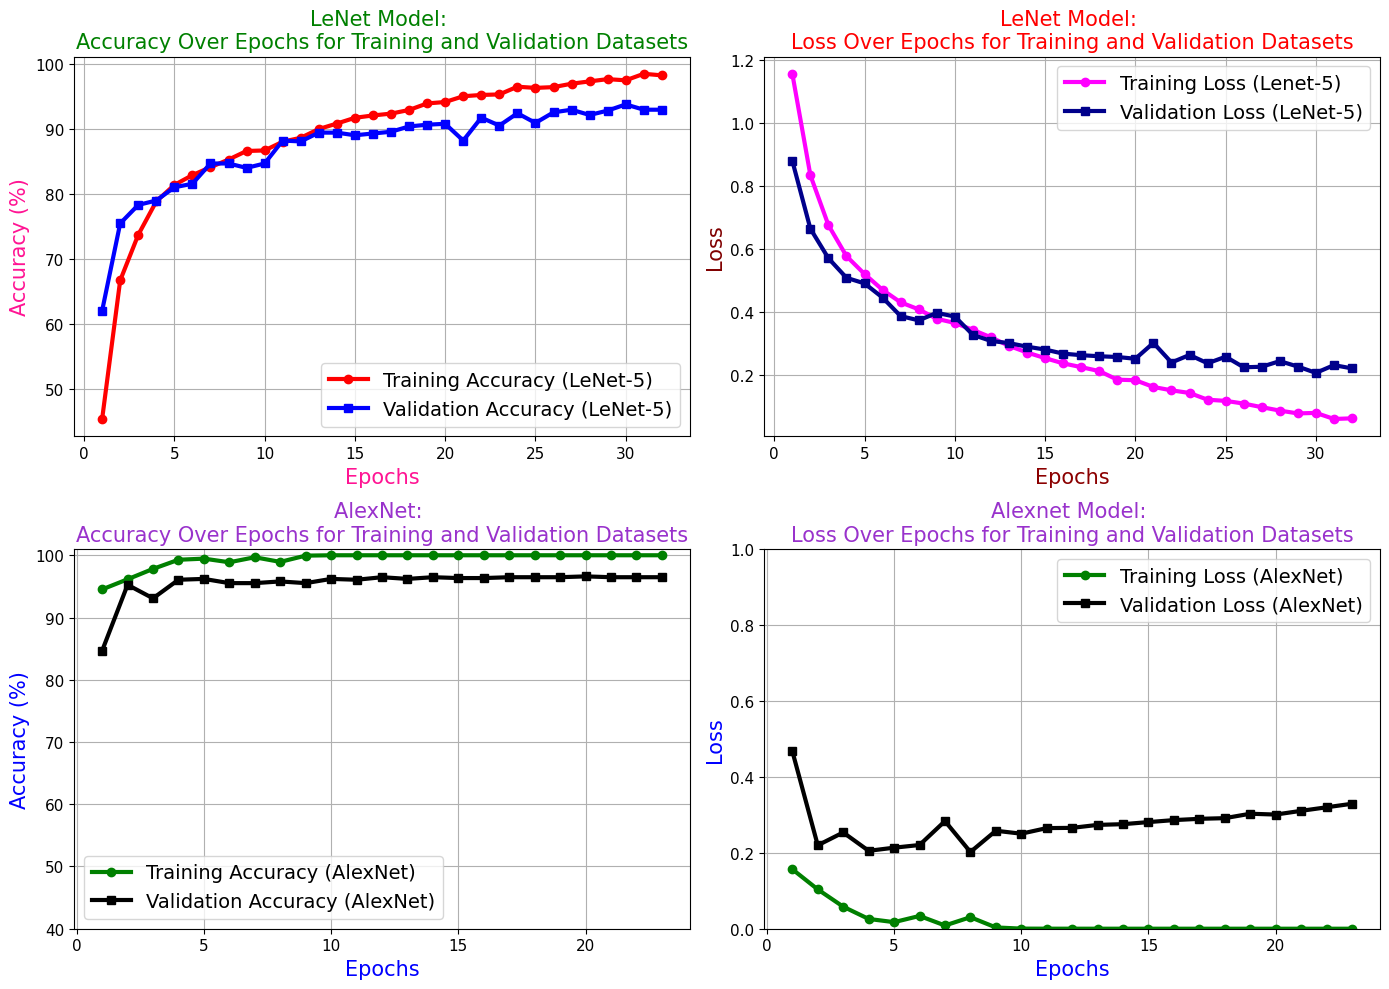

In [ ]:
##############################################################################################################
# LeNet train and loss during training for a number of epochs
##############################################################################################################
epochs_lenet= len(fit_LeNet.history['val_loss'])+1
x_lenet = list(range(1,epochs_lenet ))
loss_lenet_val = fit_LeNet.history['val_loss']
loss_lenet_train = fit_LeNet.history['loss']

accuracy_lenet_val = fit_LeNet.history['val_accuracy']
accuracy_lenet_val = [x*100 for x in accuracy_lenet_val]
accuracy_lenet_train = fit_LeNet.history['accuracy']
accuracy_lenet_train = [y*100 for y in accuracy_lenet_train]


##############################################################################################################
# AlexNet train and loss during training for a number of epochs
##############################################################################################################

epochs_alexnet = len(fit_AlexNet_NoBatch.history['val_accuracy'])+1

x_alexnet = list(range(1, epochs_alexnet))

acc_train_alex = fit_AlexNet_NoBatch.history['accuracy']
acc_train_alex = [s*100 for s in acc_train_alex]
acc_val_alex = fit_AlexNet_NoBatch.history['val_accuracy']
acc_val_alex = [ee*100 for ee in acc_val_alex]
loss_train_alex = fit_AlexNet_NoBatch.history['loss']
loss_val_alex = fit_AlexNet_NoBatch.history['val_loss']




##############################################################################################################
##############################################################################################################
##############################################################################################################


plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(x_lenet, accuracy_lenet_train, marker='o', lw=3,  color='red', label ='Training Accuracy (LeNet-5)'  )
plt.plot(x_lenet, accuracy_lenet_val, marker ='s', lw=3, color='blue', label='Validation Accuracy (LeNet-5)' )
plt.grid()
plt.xlabel('Epochs', color ='deeppink', fontsize=15)
plt.ylabel('Accuracy (%)', color ='deeppink', fontsize=15)
plt.title('LeNet Model: \nAccuracy Over Epochs for Training and Validation Datasets', color='green',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


plt.subplot(2,2,2)
plt.plot(x_lenet, loss_lenet_train, marker='o', lw=3,  color='magenta', label ='Training Loss (Lenet-5)'  )
plt.plot(x_lenet, loss_lenet_val, marker ='s', lw=3, color='darkblue', label='Validation Loss (LeNet-5)' )
plt.grid()
plt.xlabel('Epochs', color ='darkred', fontsize=15)
plt.ylabel('Loss', color ='maroon', fontsize=15)
plt.title('LeNet Model: \nLoss Over Epochs for Training and Validation Datasets', color='r',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplot(2,2,3)
plt.plot(x_alexnet,acc_train_alex )
plt.plot(x_alexnet, acc_train_alex, marker='o', lw=3,  color='green', label ='Training Accuracy (AlexNet)'  )
plt.plot(x_alexnet, acc_val_alex, marker ='s', lw=3, color='black', label='Validation Accuracy (AlexNet)' )
plt.grid()
plt.xlabel('Epochs', color ='blue', fontsize=15)
plt.ylabel('Accuracy (%)', color ='blue', fontsize=15)
plt.title('AlexNet: \nAccuracy Over Epochs for Training and Validation Datasets', color='DarkOrchid',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(40, 101)

plt.subplot(2,2,4)

plt.plot(x_alexnet, loss_train_alex, marker='o', lw=3,  color='green', label ='Training Loss (AlexNet)'  )
plt.plot(x_alexnet, loss_val_alex, marker ='s', lw=3, color='black', label='Validation Loss (AlexNet)' )
plt.grid()
plt.xlabel('Epochs', color ='blue', fontsize=15)
plt.ylabel('Loss', color ='blue', fontsize=15)
plt.title('Alexnet Model: \nLoss Over Epochs for Training and Validation Datasets', color='DarkOrchid',fontsize=15)
plt.legend(fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0., 1)


plt.tight_layout()
plt.show()

41/41 [==============================] - 7s 160ms/step
Printing Classification Report for AlexNet Model
                  precision    recall  f1-score   support

        No Tumor       0.99      0.99      0.99       405
    Glioma Tumor       0.96      0.93      0.94       300
Meningioma Tumor       0.91      0.95      0.93       306
 Pituitary Tumor       0.97      0.95      0.96       300

        accuracy                           0.96      1311
       macro avg       0.96      0.96      0.96      1311
    weighted avg       0.96      0.96      0.96      1311

Printing Confusion Matrix for AlexNet Model


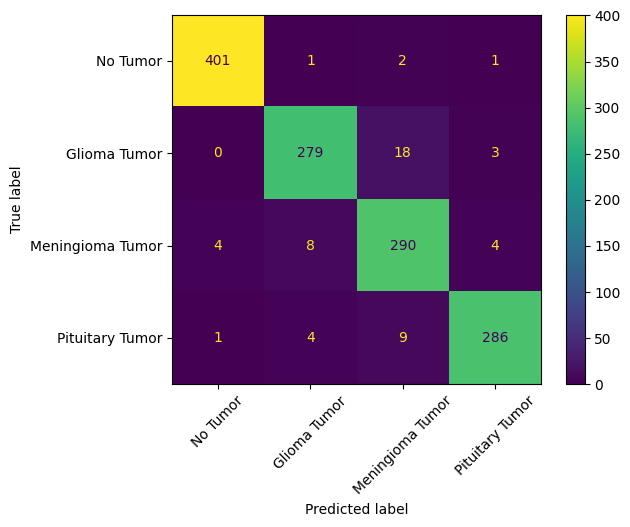



###############################################################################################################
41/41 [==============================] - 2s 44ms/step
Printing Confusion Matrix for Lenet-5 Model
                  precision    recall  f1-score   support

        No Tumor       0.98      0.99      0.98       405
    Glioma Tumor       0.90      0.88      0.89       300
Meningioma Tumor       0.90      0.86      0.88       306
 Pituitary Tumor       0.92      0.97      0.94       300

        accuracy                           0.93      1311
       macro avg       0.92      0.92      0.92      1311
    weighted avg       0.93      0.93      0.93      1311

Printing Confution Matrix for model with batch normalization and and dropout


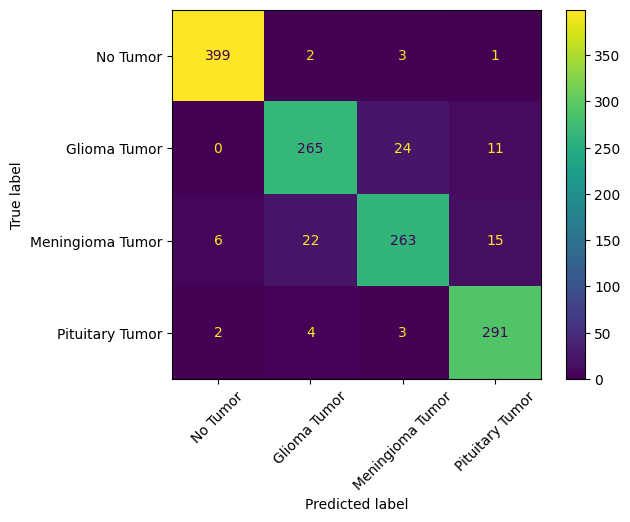

In [ ]:
###############################################################################################################
# AlexNet Model Performance: Evaluate using Confusion Matrix and Classification Report
###############################################################################################################

y_prob_AlexNet = Model_AlexNet_NoBatch.predict(X_test_alexnet)

pred_Optcome_AlexNet = np.argmax(y_prob_AlexNet, axis=1)

target_names = [class_names[i] for i in range(4)]
print('Printing Classification Report for AlexNet Model')
print(classification_report(y_test_alexnet, pred_Optcome_AlexNet, target_names=target_names))

print('Printing Confusion Matrix for AlexNet Model')

cm_alex = confusion_matrix(y_test_alexnet, pred_Optcome_AlexNet)
disp_confution_alex = ConfusionMatrixDisplay(confusion_matrix=cm_alex, display_labels=target_names)
disp_confution_alex.plot()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()
#################################################################################################################

print('\n')
print('###############################################################################################################')

###############################################################################################################
# Lenet-5 Model Performance: Evaluate using Confusion Matrix and Classification Report
###############################################################################################################


y_prob_Lenet = Model_Lenet.predict(X_test_lenet)

pred_Optcome_Lenet = np.argmax(y_prob_Lenet, axis=1)

print('Printing Confusion Matrix for Lenet-5 Model')


print(classification_report(y_test_lenet, pred_Optcome_Lenet, target_names=target_names))

print('Printing Confution Matrix for model with batch normalization and and dropout')

cm_letnet = confusion_matrix(y_test_lenet, pred_Optcome_Lenet)
disp_lenet = ConfusionMatrixDisplay(confusion_matrix=cm_letnet, display_labels=target_names)
disp_lenet.plot()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()


### categorical_crossentropy expects targets to be in a one-hot encoded format, making it suitable for multi-class classification problems where each target class value is represented as a one-hot vector. On the other hand, keras.losses.SparseCategoricalCrossentropy() expects targets to be integers and directly takes the class indices, simplifying the process by not requiring one-hot encoding of the labels.


In [ ]:
# Convert labels to one-hot encoding format for training, validation, and testing sets.
train_labels_alex = to_categorical(y_train_alexnet, 4)
val_labels_alex = to_categorical(y_val_alexnet, 4)
test_labels_alex = to_categorical(y_test_alexnet, 4)  # Note: This should likely be y_test_alexnet if test labels are intended.

# Define metrics to be used for evaluating the model, including accuracy, precision, and recall.
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

# Initialize the AlexNet model with one-hot encoded outputs.
model_categorical_Alexnet = AlexNet_CNN(input_alex)

# Compile the model with specified optimizer, loss function, and evaluation metrics.
model_categorical_Alexnet.compile(
    optimizer=chosen_Optimizer_alexnet,
    loss='categorical_crossentropy',
    metrics=METRICS
)

# Print a summary of the AlexNet model to review its architecture and parameters.
model_categorical_Alexnet.summary()


Model: "AlexNet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 58, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 28, 28, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)     

In [ ]:
# Using 'categorical loss function'

# Train the AlexNet model without batch normalization on the specified dataset for a number of epochs,
# using early stopping based on validation data performance.

alexnet_caterorical_history = model_categorical_Alexnet.fit(X_train_alexnet, train_labels_alex, epochs=27,
                                                    callbacks = [My_early_stopping], validation_data = (X_val_alexnet, val_labels_alex) )

Epoch 1/27
156/156 [==============================] - 110s 700ms/step - loss: 0.9891 - accuracy: 0.5411 - precision: 0.7742 - recall: 0.3232 - val_loss: 0.7570 - val_accuracy: 0.7205 - val_precision: 0.8311 - val_recall: 0.5142
Epoch 2/27
156/156 [==============================] - 109s 698ms/step - loss: 0.5699 - accuracy: 0.7887 - precision: 0.8356 - recall: 0.7252 - val_loss: 0.5041 - val_accuracy: 0.8453 - val_precision: 0.8846 - val_recall: 0.7802
Epoch 3/27
156/156 [==============================] - 108s 693ms/step - loss: 0.3785 - accuracy: 0.8647 - precision: 0.8882 - recall: 0.8430 - val_loss: 0.2899 - val_accuracy: 0.8996 - val_precision: 0.9102 - val_recall: 0.8942
Epoch 4/27
156/156 [==============================] - 106s 682ms/step - loss: 0.2698 - accuracy: 0.9067 - precision: 0.9185 - recall: 0.8953 - val_loss: 0.2613 - val_accuracy: 0.9091 - val_precision: 0.9178 - val_recall: 0.8942
Epoch 5/27
156/156 [==============================] - 110s 706ms/step - loss: 0.1886 - a

# LeNet-5 model

In [ ]:
# LeNet Model
# Convert labels to one-hot encoding format for training, validation, and testing sets.
train_labels_lenet = to_categorical(y_train_lenet, 4)
val_labels_lenet = to_categorical(y_val_lenet, 4)
test_labels_lenet = to_categorical(y_test_lenet, 4)

# Define metrics to be used for evaluating the model, including accuracy, precision, and recall.

METRICS =['accuracy',
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')]

# Initialize the LeNet model with one-hot encoded outputs.
model_categorical_LeNet = LeNet_5_CNN(input_lenet)

# Compile the model with specified optimizer, loss function, and evaluation metrics.

model_categorical_LeNet.compile(optimizer=chosen_Optimizer_lenet,
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Print a summary of the LeNet-5 model to review its architecture and parameters.
model_categorical_LeNet.summary()

Model: "LeNet5_MRI"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 1)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 248, 248, 26)      260       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 62, 62, 26)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 68)        15980     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 68)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 15300)             0

In [ ]:
# Train the LeNet model using the objective function 'XXX on the specified dataset for a number of epochs,
# using early stopping based on validation data performance.
lenet_caterorical_history = model_categorical_LeNet.fit(X_train_lenet, train_labels_lenet, epochs=32,
                                                        callbacks=[My_early_stopping], validation_data=[X_val_lenet, val_labels_lenet],
                                                        verbose=1)

Epoch 1/32
156/156 [==============================] - 23s 144ms/step - loss: 1.1324 - accuracy: 0.4685 - precision: 0.8768 - recall: 0.1717 - val_loss: 0.8503 - val_accuracy: 0.6703 - val_precision: 0.8589 - val_recall: 0.3799
Epoch 2/32
156/156 [==============================] - 22s 142ms/step - loss: 0.7987 - accuracy: 0.6850 - precision: 0.8020 - recall: 0.4886 - val_loss: 0.6663 - val_accuracy: 0.7436 - val_precision: 0.8079 - val_recall: 0.6106
Epoch 3/32
156/156 [==============================] - 22s 143ms/step - loss: 0.6454 - accuracy: 0.7618 - precision: 0.8260 - recall: 0.6595 - val_loss: 0.5465 - val_accuracy: 0.7951 - val_precision: 0.8196 - val_recall: 0.7273
Epoch 4/32
156/156 [==============================] - 22s 142ms/step - loss: 0.5484 - accuracy: 0.7986 - precision: 0.8425 - recall: 0.7278 - val_loss: 0.4843 - val_accuracy: 0.8128 - val_precision: 0.8430 - val_recall: 0.7720
Epoch 5/32
156/156 [==============================] - 22s 141ms/step - loss: 0.4872 - accura

In [ ]:

##################################################################################################################
# LeNet: Accuracy, Precision and Recall over epochs during training
##################################################################################################################
x_max_lenet = len(lenet_caterorical_history.history['precision'])+1
x_range_letnet = list(range(1, x_max_lenet))

precision_lenet_train = lenet_caterorical_history.history['precision']
precision_lenet_train = [y1*100 for y1 in precision_lenet_train]
precision_lenet_val = lenet_caterorical_history.history['val_precision']
precision_lenet_val = [y2*100 for y2 in precision_lenet_val]

recall_lenet_train = lenet_caterorical_history.history['recall']
recall_lenet_train = [y3*100 for y3 in recall_lenet_train]
recall_lenet_val = lenet_caterorical_history.history['val_recall']
recall_lenet_val = [y4*100 for y4 in recall_lenet_val]


acc_val_lenet = lenet_caterorical_history.history['val_accuracy']
acc_val_lenet = [y5*100 for y5 in acc_val_lenet]
acc_train_lenet = lenet_caterorical_history.history['accuracy']
acc_train_lenet = [y6*100 for y6 in acc_train_lenet]

loss_val_lenet = lenet_caterorical_history.history['val_loss']
loss_train_lenet = lenet_caterorical_history.history['loss']

##################################################################################################################
# AlexNet: Accuracy, Precision and Recall over epochs during training
##################################################################################################################


x_max_alex = len(alexnet_caterorical_history.history['precision'])+1
x_range_alex = list(range(1, x_max_alex))

#alexnet_caterorical_history

precision_train_alex = alexnet_caterorical_history.history['precision']
precision_train_alex = [x1*100 for x1 in precision_train_alex ]
precision_val_alex = alexnet_caterorical_history.history['val_precision']
precision_val_alex = [ x2*100 for x2 in precision_val_alex]

recall_train_alex = alexnet_caterorical_history.history['recall']
recall_train_alex = [x3*100 for x3 in recall_train_alex]
recall_val_alex = alexnet_caterorical_history.history['val_recall']
recall_val_alex = [x4*100 for x4 in recall_val_alex]



acc_val_alex = alexnet_caterorical_history.history['val_accuracy']
acc_val_alex = [x5*100 for x5 in acc_val_alex]
acc_train_alex = alexnet_caterorical_history.history['accuracy']
acc_train_alex = [x6*100 for x6 in acc_train_alex]

loss_val_alex = alexnet_caterorical_history.history['val_loss']
loss_train_alex = alexnet_caterorical_history.history['loss']




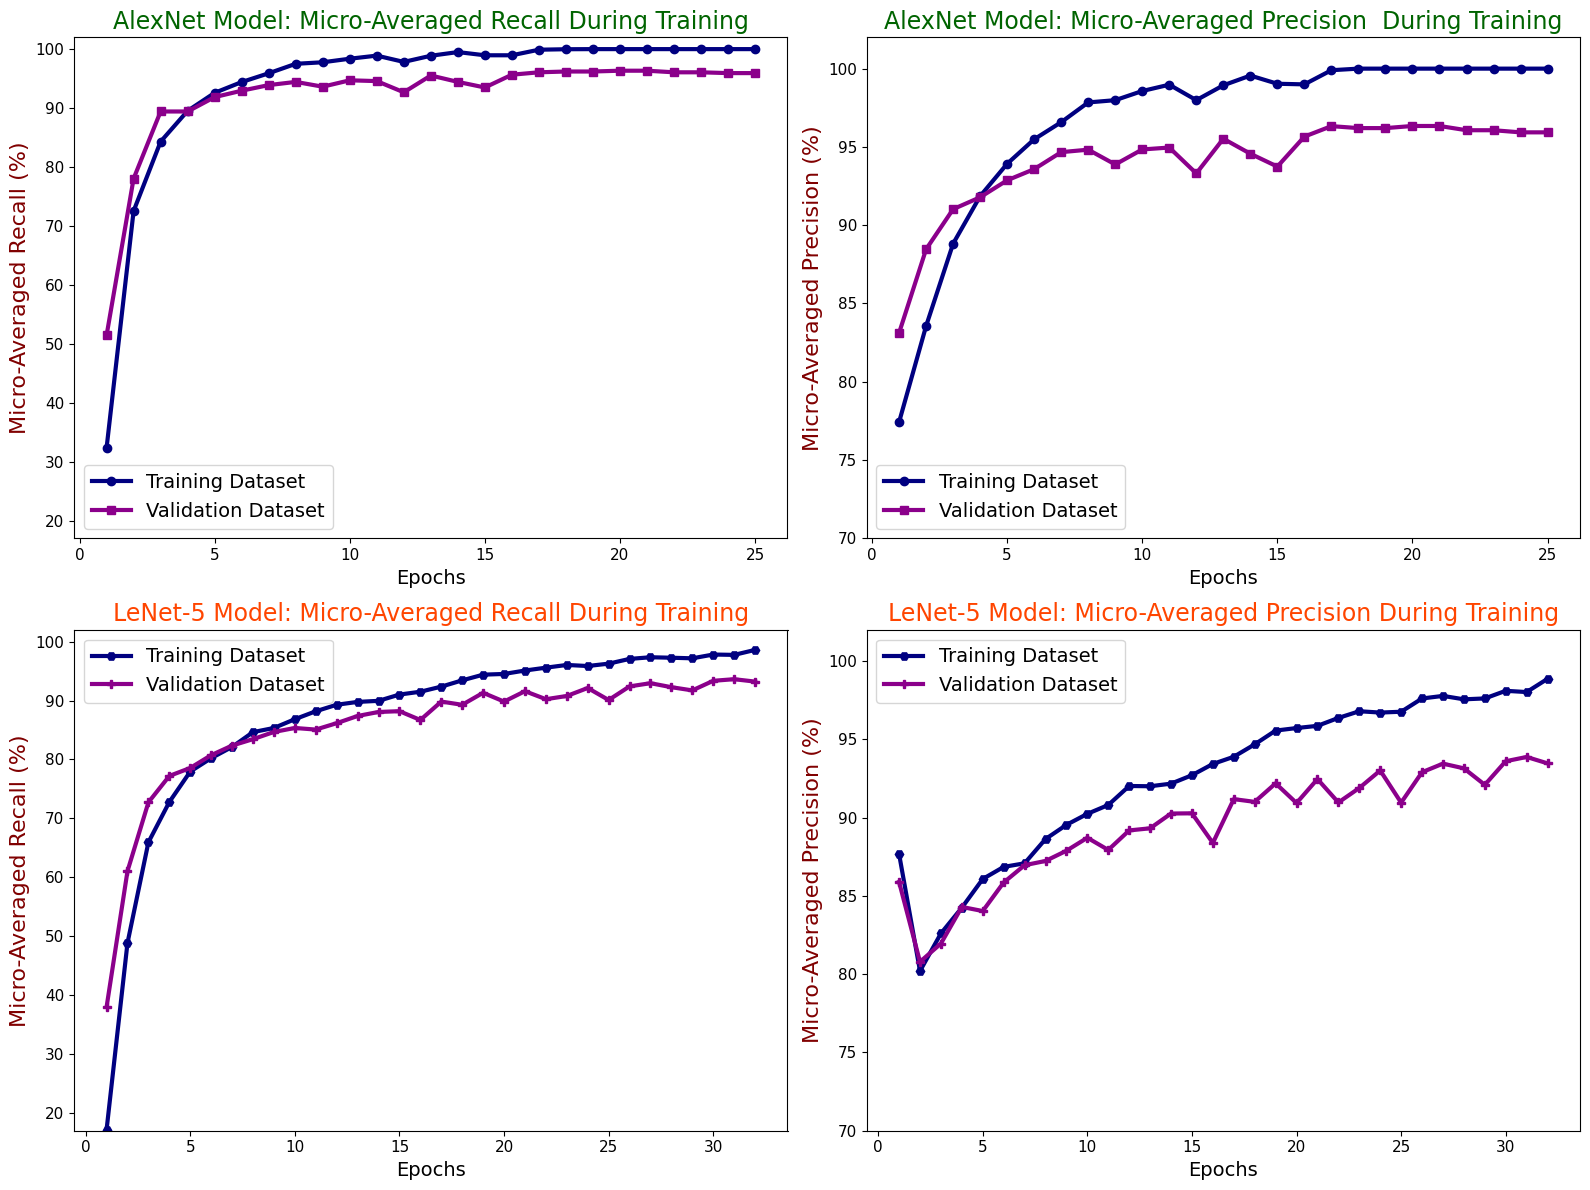

In [ ]:
plt.figure(figsize= (16,12))
plt.subplot(2, 2,1)
plt.plot(x_range_alex, recall_train_alex, 'o-', lw=3,  color='navy', label='Training Dataset')
plt.plot(x_range_alex, recall_val_alex,'s-', lw=3, color ='darkmagenta', label='Validation Dataset')
plt.legend(fontsize=14)
plt.title('AlexNet Model: Micro-Averaged Recall During Training', color='darkgreen', fontsize=17)
plt.xlabel('Epochs', color='black', fontsize=14)
plt.ylabel('Micro-Averaged Recall (%)', color='maroon', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(17, 102)


plt.subplot(2, 2,2)
plt.plot(x_range_alex, precision_train_alex, 'o-', lw=3,  color='navy', label='Training Dataset')
plt.plot(x_range_alex, precision_val_alex, 's-', lw=3, color ='darkmagenta', label='Validation Dataset')
plt.title('AlexNet Model: Micro-Averaged Precision  During Training', color='darkgreen', fontsize=17)
plt.xlabel('Epochs', color='black', fontsize=14)
plt.ylabel('Micro-Averaged Precision (%)', color='maroon', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=14)
plt.ylim(70, 102)




plt.subplot(2, 2,3)
plt.plot(x_range_letnet, recall_lenet_train, 'H-', lw=3,  color='navy', label='Training Dataset')
plt.plot(x_range_letnet, recall_lenet_val,'P-', lw=3, color ='darkmagenta', label='Validation Dataset')
#orangered
plt.legend(fontsize=14)
plt.title('LeNet-5 Model: Micro-Averaged Recall During Training', color='orangered', fontsize=17)
plt.xlabel('Epochs', color='black', fontsize=14)
plt.ylabel('Micro-Averaged Recall (%)', color='maroon', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(17, 102)


plt.subplot(2, 2,4)
plt.plot(x_range_letnet, precision_lenet_train, 'H-', lw=3,  color='navy', label='Training Dataset')
plt.plot(x_range_letnet, precision_lenet_val, 'P-', lw=3, color ='darkmagenta', label='Validation Dataset')
plt.title('LeNet-5 Model: Micro-Averaged Precision During Training', color='orangered', fontsize=17)
plt.xlabel('Epochs', color='black', fontsize=14)
plt.ylabel('Micro-Averaged Precision (%)', color='maroon', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=14)
plt.ylim(70, 102)
plt.tight_layout()
plt.show()

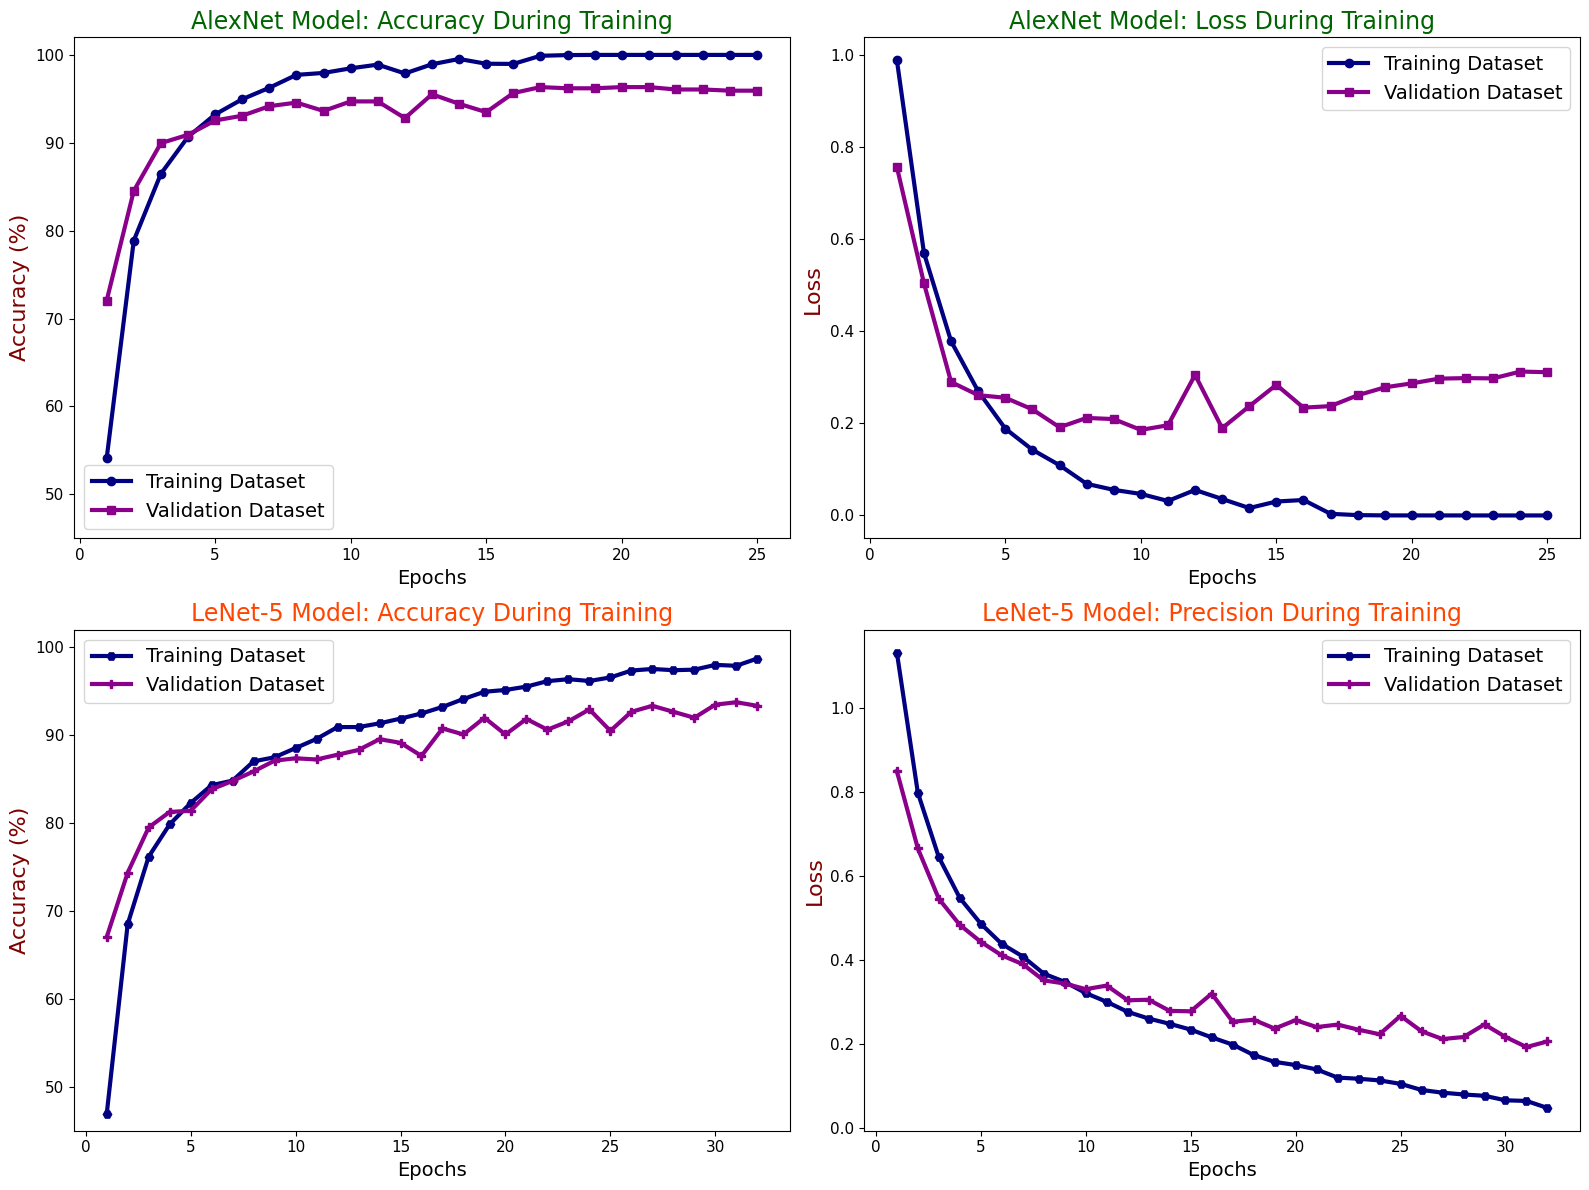

In [ ]:
plt.figure(figsize= (16,12))
plt.subplot(2, 2,1)
plt.plot(x_range_alex, acc_train_alex, 'o-', lw=3,  color='navy', label='Training Dataset')
plt.plot(x_range_alex, acc_val_alex,'s-', lw=3, color ='darkmagenta', label='Validation Dataset')
plt.title('AlexNet Model: Accuracy During Training', color='darkgreen', fontsize=17)
plt.xlabel('Epochs', color='black', fontsize=14)
plt.ylabel('Accuracy (%)', color='maroon', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(45, 102)


plt.subplot(2, 2,2)
plt.plot(x_range_alex, loss_train_alex, 'o-', lw=3,  color='navy', label='Training Dataset')
plt.plot(x_range_alex, loss_val_alex, 's-', lw=3, color ='darkmagenta', label='Validation Dataset')
plt.title('AlexNet Model: Loss During Training', color='darkgreen', fontsize=17)
plt.xlabel('Epochs', color='black', fontsize=14)
plt.ylabel('Loss ', color='maroon', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)



plt.subplot(2, 2,3)
plt.plot(x_range_letnet, acc_train_lenet, 'H-', lw=3,  color='navy', label='Training Dataset')
plt.plot(x_range_letnet, acc_val_lenet,'P-', lw=3, color ='darkmagenta', label='Validation Dataset')
#orangered
plt.legend(fontsize=14)
plt.title('LeNet-5 Model: Accuracy During Training', color='orangered', fontsize=17)
plt.xlabel('Epochs', color='black', fontsize=14)
plt.ylabel('Accuracy (%)', color='maroon', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(45, 102)


plt.subplot(2, 2,4)
plt.plot(x_range_letnet, loss_train_lenet, 'H-', lw=3,  color='navy', label='Training Dataset')
plt.plot(x_range_letnet, loss_val_lenet, 'P-', lw=3, color ='darkmagenta', label='Validation Dataset')
plt.title('LeNet-5 Model: Precision During Training', color='orangered', fontsize=17)
plt.xlabel('Epochs', color='black', fontsize=14)
plt.ylabel('Loss', color='maroon', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()



In [ ]:
target_names = [class_names[i] for i in range(4)]

41/41 [==============================] - 7s 160ms/step
Printing Classification Report for AlexNet Model
                  precision    recall  f1-score   support

        No Tumor       0.99      1.00      0.99       405
    Glioma Tumor       0.96      0.91      0.93       300
Meningioma Tumor       0.90      0.97      0.93       306
 Pituitary Tumor       0.99      0.95      0.97       300

        accuracy                           0.96      1311
       macro avg       0.96      0.95      0.96      1311
    weighted avg       0.96      0.96      0.96      1311

Printing Confusion Matrix for AlexNet Model


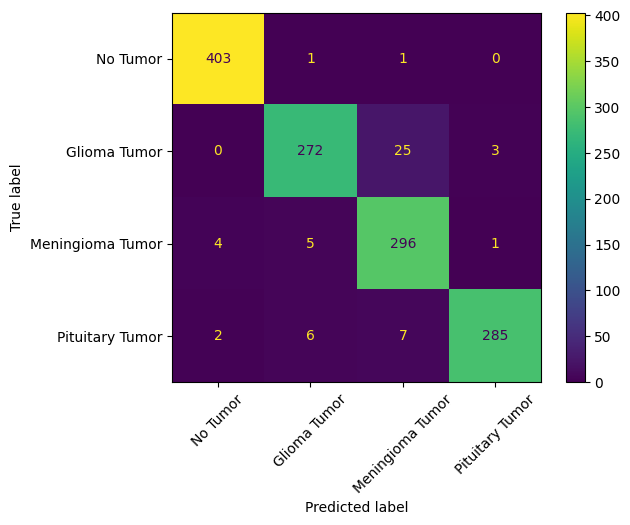

In [ ]:
###############################################################################################################
# AlexNet Model Performance: Evaluate using Confusion Matrix and Classification Report
###############################################################################################################

y_prob_alexlast = model_categorical_Alexnet.predict(X_test_alexnet)

pred_Optcome_Alexlast = np.argmax(y_prob_alexlast, axis=1)


print('Printing Classification Report for AlexNet Model')
print(classification_report(y_test_alexnet, pred_Optcome_Alexlast, target_names=target_names))

print('Printing Confusion Matrix for AlexNet Model')

cm_alex_last = confusion_matrix(y_test_alexnet, pred_Optcome_Alexlast)
disp_confution_alex_last = ConfusionMatrixDisplay(confusion_matrix=cm_alex_last, display_labels=target_names)
disp_confution_alex_last.plot()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()
#################################################################################################################




###############################################################################################################


41/41 [==============================] - 2s 44ms/step


Printing Classification Report for LeNet-5 Model


                  precision    recall  f1-score   support

        No Tumor       0.97      0.98      0.98       405
    Glioma Tumor       0.93      0.83      0.88       300
Meningioma Tumor       0.86      0.89      0.87       306
 Pituitary Tumor       0.92      0.97      0.94       300

        accuracy                           0.92      1311
       macro avg       0.92      0.92      0.92      1311
    weighted avg       0.92      0.92      0.92      1311



Printing Confusion Matrix for LeNet-5 Model


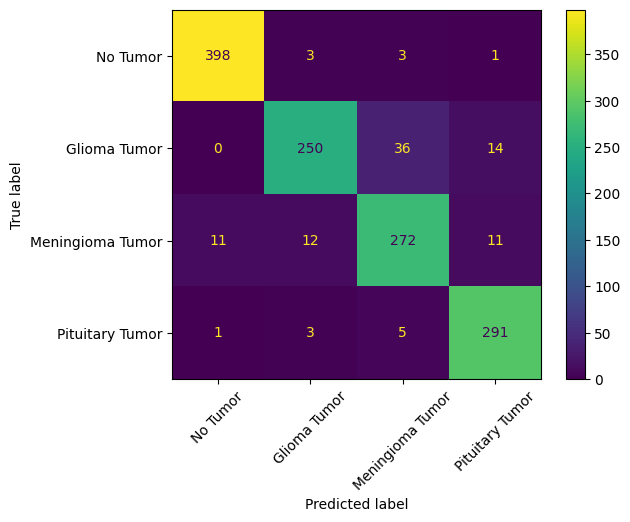

In [ ]:
###############################################################################################################
# LeNet-5 Model Performance: Evaluate using Confusion Matrix and Classification Report
###############################################################################################################

print('\n')
print('###############################################################################################################')
print('\n')

y_prob_lenet_last = model_categorical_LeNet.predict(X_test_lenet)
pred_Optcome_lenet_last = np.argmax(y_prob_lenet_last, axis=1)
print('\n')
print('Printing Classification Report for LeNet-5 Model')
print('\n')
print(classification_report(y_test_lenet, pred_Optcome_lenet_last, target_names=target_names))

print('\n')


print('Printing Confusion Matrix for LeNet-5 Model')

cm_lanetos = confusion_matrix(y_test_lenet, pred_Optcome_lenet_last)
disp_confution_lenetos = ConfusionMatrixDisplay(confusion_matrix=cm_lanetos, display_labels=target_names)
disp_confution_lenetos.plot()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()



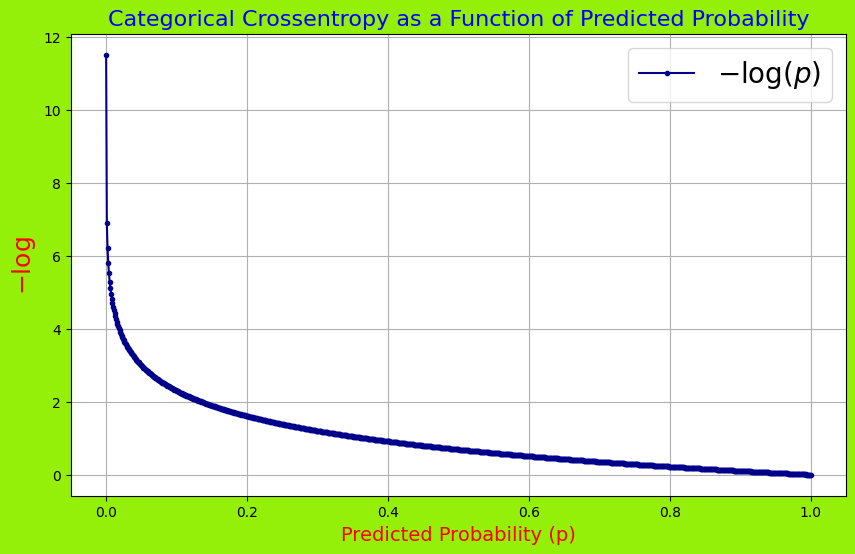

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6), facecolor='#94F008')
x = np.arange(0.00001, 1.0001, step=0.001)

y = [-np.log(value) for value in x]
# Plot the cross-entropy
plt.plot(x, y, '.-', color='darkblue', label=r'$-\log(p)$')

# Add legend, labels, and grid
plt.legend(fontsize=20)
plt.xlabel(r'Predicted Probability (p)', color='red', fontsize=14)
plt.ylabel(r'$-\log$', color='red', fontsize=18)
plt.title('Categorical Crossentropy as a Function of Predicted Probability',color='blue', fontsize=16)
plt.grid()

# Show plot
plt.show()
